In [28]:
from sklearn.datasets import fetch_california_housing as fch
from sklearn import preprocessing as prep
import pandas as pd
import seaborn as sns
import numpy as np

In [105]:
data = fch()
df = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=data.feature_names + data.target_names)

In [23]:
#Проверка на пропуски
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


(None, MedInc         0
 HouseAge       0
 AveRooms       0
 AveBedrms      0
 Population     0
 AveOccup       0
 Latitude       0
 Longitude      0
 MedHouseVal    0
 dtype: int64)

In [47]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [116]:
#Нормализуем столбец Population с помощью масштабирования, так как у него самый большой разброс значений
df.Population = prep.minmax_scale(df.Population, feature_range=(0,1))

In [117]:
# Разделение данных
from sklearn.model_selection import train_test_split
x, y = df.drop('MedHouseVal', axis=1), df.MedHouseVal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [120]:
# Обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5757877060324508

In [128]:
# Обучение модели дерева решений без передачи входных параметров
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
model_tree.score(x_test, y_test)

0.6273060859559392

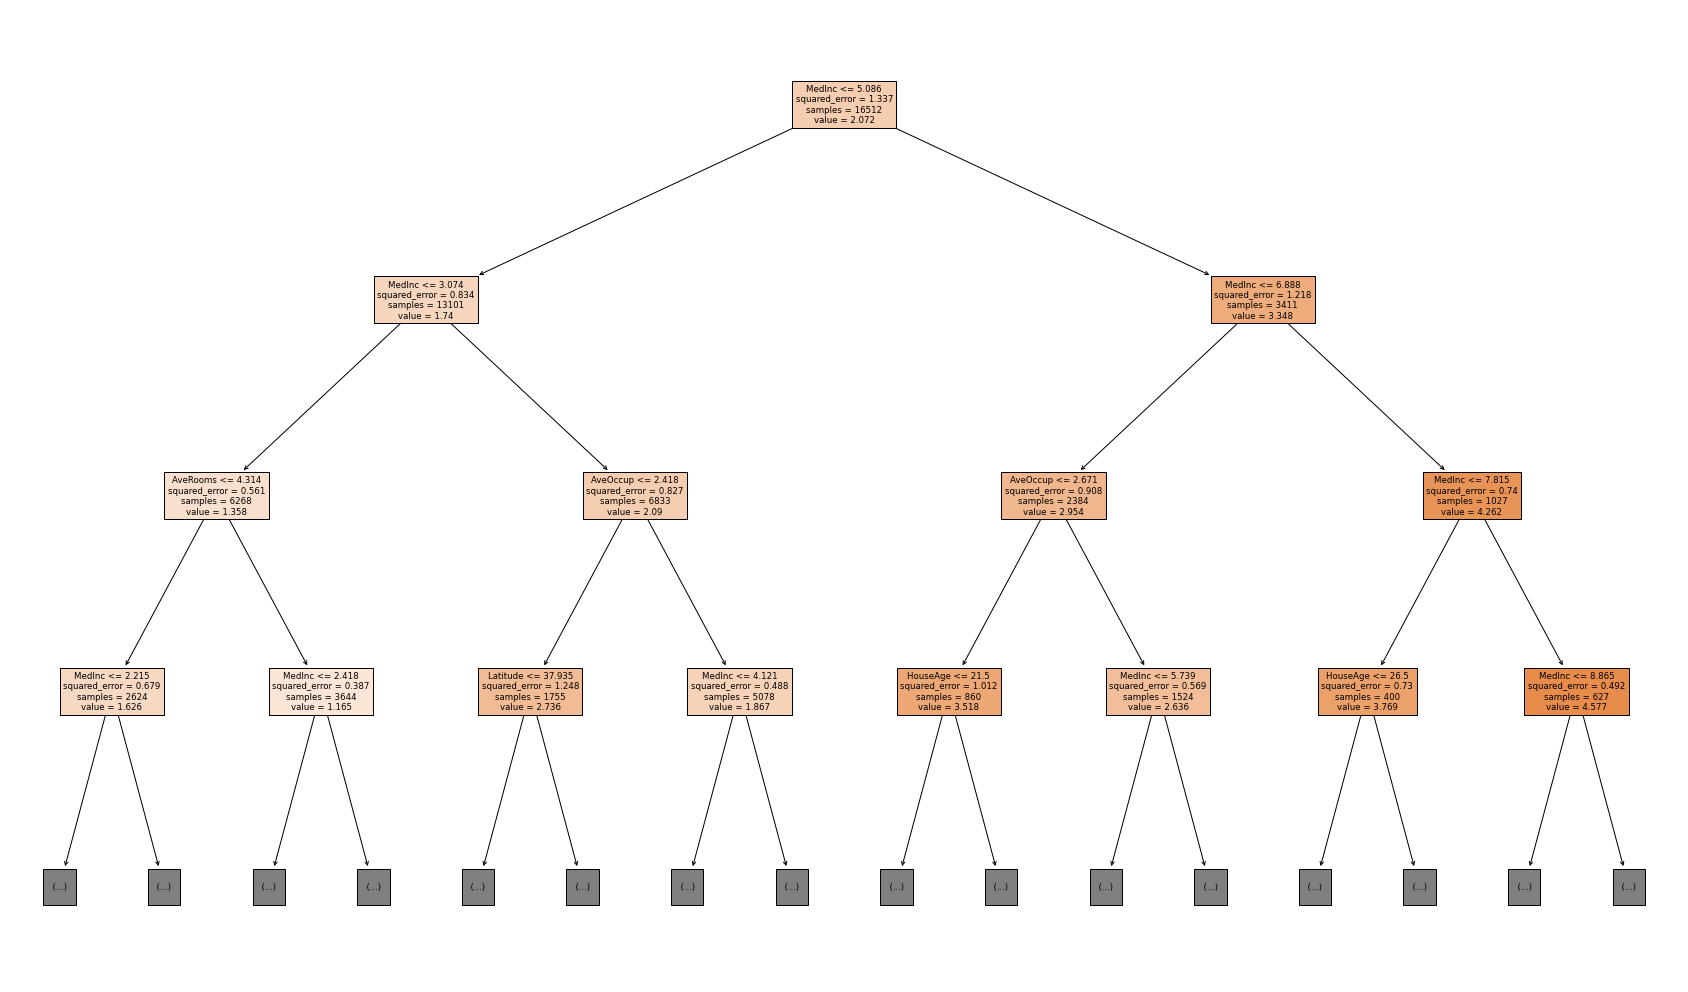

In [127]:
# Вывод частичного дерева
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 18))
plot_tree(model_tree, max_depth=3, feature_names=x.columns, filled=True);

In [164]:
# Ограничил максимальную глубину дерева до 20 и минимальное количество объектов внутри 1 блока также до 20.
model_tree_2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=20)
model_tree_2.fit(x_train, y_train)
model_tree_2.score(x_test, y_test)

0.7273081251592183

В результате модель дерева решений с входными параметрами показала себя лучше всего. Скорее всего это связано с тем, что сложность данной модели выше чем у линейной регрессии.

Линейную регрессию удобно использовать для построения довольно простых моделей с отсутствием выбросов. Она хороша предсказывает значения и проста в освоении

Дерево решений не так хорошо подходит для задач регресии, так как предсказывать ей очень тяжело, потому что она очень чувствительна к новым данным, из-за чего ее возможно придется переучивать, она лучше подойдет для задач классификации, так как из-за своей неустойчивости хорошо подходят для ансамблирования. Поэтому будет достаточно высокий результат в задачах классификации.

Распишем недостатки относительно друг друга:
1. Неустойчивость к выбросам и шумам и у той и у другой модели
2. ДР легко переобучается

Достоинства:
1. Обе достаточно быстрые
2. ДР составляют четкие и понятные правила отбора, что делает ее легко интерпритируемой
3. Более простая подготовка данных (не требуется нормализация, dummy и возможны пропуски)

